In [43]:
#Data manipulation and preprocessing 
import pandas as pd
import numpy as np
#Data exploration
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#Data balancing
from imblearn.over_sampling import SMOTE
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier

#Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

In [44]:
data = pd.read_csv("urinalysis_tests.csv")#importing the dataset
data.drop(columns = "Unnamed: 0", axis = 1,inplace = True)#removing the unnamed column
data.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [45]:
data_copy = data.copy()


In [46]:
#replace categorical data with an ordinal format
data_copy['Transparency'] = data_copy['Transparency'].replace({'CLEAR': 1, 'SLIGHTLY HAZY': 2, 
                                                               'HAZY': 3, 'CLOUDY': 4, 'TURBID': 5})
data_copy['Glucose'] =data_copy['Glucose'].replace({'NEGATIVE': 1, 'TRACE': 2, '1+': 3,
                                       '2+': 4, '3+': 5, '4+': 6})
data_copy['Protein'] = data_copy['Protein'].replace({'NEGATIVE': 1, 'TRACE': 2, '1+': 3,
                                       '2+': 4, '3+': 5})
data_copy['Epithelial Cells'] = data_copy['Epithelial Cells'].replace({'NONE SEEN': 1, 'RARE': 2, 'OCCASIONAL': 3,
                                                         'FEW': 4, 'MODERATE': 5, 'PLENTY': 6, 'LOADED': 7})
data_copy['Mucous Threads'] = data_copy['Mucous Threads'].replace({'NONE SEEN': 1, 'RARE': 2, 'OCCASIONAL': 3,
                                                     'FEW': 4, 'MODERATE': 5, 'PLENTY': 6})
data_copy['Amorphous Urates'] =data_copy['Amorphous Urates'].replace({'NONE SEEN': 1, 'RARE': 2, 'OCCASIONAL': 3,
                                                         'FEW': 4, 'MODERATE': 5, 'PLENTY': 6, 'LOADED': 7})
data_copy['Bacteria'] = data_copy['Bacteria'].replace({'NONE SEEN': 1, 'RARE': 2, 'OCCASIONAL': 3, 'FEW': 4,
                                         'MODERATE': 5, 'PLENTY': 6, 'LOADED': 7})

In [47]:
data_copy['Diagnosis'].replace({'NEGATIVE':0,'POSITIVE':1},inplace = True)

In [48]:
wbc_order = ['0-0',
    '0-1', '0-2', '0-3', '0-4', '1-2', '1-3', '1-4', '1-5', '1-6', '2-3', '2-4', '2-5','2-6', '2-7', 
    '3-4', '3-5', '3-6', '3-7', '3-10', '4-5', '4-6', '4-7', '4-8', '4-10', '5-6', '5-7', 
    '5-8', '5-10','5-12', '6-8', '6-14','7-8', '7-9', '7-10', '7-15', '8-10', '8-11', '8-12', '9-11', 
    '9-12', '9-15', '10-12', '10-15', '10-16', '10-18','11-13', '11-14', '11-15', '12-14', 
    '12-15', '12-17', '13-15', '14-16', '15-17', '15-18','16-18', '15-20', '15-21', '15-22', 
    '15-28', '17-20', '18-20', '18-21', '18-22', '18-25', '20-22', '20-25',  '22-24','23-25', 
    '25-30', '25-32', '28-30', '28-35', '30-32', '30-35','30-40', '34-36','36-38', '35-40','38-40', '45-50', 
    '48-55', '48-62','50-55', '55-58', '70-75', '79-85', '85-87','>50', '>100', 'LOADED','TNTC']

# Replace values in the 'WBC' column with their ordinal number
data_copy['WBC'] = data_copy['WBC'].replace({val: i+1 for i, val in enumerate(wbc_order)})
# Replace values in the 'RBC' column with their ordinal number
data_copy['RBC'] = data_copy['RBC'].replace({val: i+1 for i, val in enumerate(wbc_order)})

In [49]:
data_copy.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,1,1,1,5.0,1.010,7,3,3,2,1,3,0
1,9.0,MALE,DARK YELLOW,2,1,3,5.0,1.030,7,3,2,4,4,5,0
2,12.0,MALE,LIGHT YELLOW,2,1,2,5.0,1.030,4,3,2,4,5,2,0
3,77.0,MALE,BROWN,4,1,3,6.0,1.020,28,92,2,2,1,4,0
4,29.0,FEMALE,YELLOW,3,1,2,6.0,1.025,8,3,2,2,1,4,0


In [50]:
set(data_copy['RBC'].values)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 17,
 18,
 22,
 25,
 27,
 28,
 29,
 31,
 32,
 37,
 39,
 40,
 41,
 43,
 47,
 51,
 52,
 53,
 57,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 76,
 79,
 81,
 84,
 89,
 90,
 91,
 92,
 93}

In [51]:
data_copy= pd.get_dummies(data_copy, columns=['Gender', 'Color'])

In [52]:
data_copy.head()

,Age,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,...,Color_AMBER,Color_BROWN,Color_DARK YELLOW,Color_LIGHT RED,Color_LIGHT YELLOW,Color_RED,Color_REDDISH,Color_REDDISH YELLOW,Color_STRAW,Color_YELLOW
0,76.0,1,1,1,5.0,1.010,7,3,3,2,...,False,False,False,False,True,False,False,False,False,False
1,9.0,2,1,3,5.0,1.030,7,3,2,4,...,False,False,True,False,False,False,False,False,False,False
2,12.0,2,1,2,5.0,1.030,4,3,2,4,...,False,False,False,False,True,False,False,False,False,False
3,77.0,4,1,3,6.0,1.020,28,92,2,2,...,False,True,False,False,False,False,False,False,False,False
4,29.0,3,1,2,6.0,1.025,8,3,2,2,...,False,False,False,False,False,False,False,False,False,True


In [53]:
data.columns

Index(['Age', 'Gender', 'Color', 'Transparency', 'Glucose', 'Protein', 'pH',
       'Specific Gravity', 'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads',
       'Amorphous Urates', 'Bacteria', 'Diagnosis'],
      dtype='object')

In [54]:
x = data_copy.drop('Diagnosis',axis = 1)
y = data_copy['Diagnosis']
x.tail()

,Age,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,...,Color_AMBER,Color_BROWN,Color_DARK YELLOW,Color_LIGHT RED,Color_LIGHT YELLOW,Color_RED,Color_REDDISH,Color_REDDISH YELLOW,Color_STRAW,Color_YELLOW
1431,0.06,1,1,1,6.0,1.015,6,2,2,4,...,False,False,False,False,False,False,False,False,False,True
1432,42.00,1,1,1,6.5,1.010,3,3,2,1,...,False,False,False,False,False,False,False,False,False,True
1433,47.00,1,1,2,6.0,1.030,12,3,5,5,...,False,False,True,False,False,False,False,False,False,False
1434,57.00,1,1,2,5.0,1.030,3,3,6,6,...,False,False,True,False,False,False,False,False,False,False
1435,3.00,1,1,1,6.0,1.020,2,3,2,2,...,False,False,False,False,False,False,False,False,False,True


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 40)
print(len(x_train))
print(len(x_test))

1005
431


In [56]:
class TrainImbModels:
    def __init__(self,model,x_train, y_train, x_test, y_test):
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.predictions = None
    def imb_model(self):#function for training models
        self.model.fit(self.x_train,self.y_train)
        self.predictions = self.model.predict(x_test)
        return print(classification_report(self.y_test,self.predictions))
    def plot_cm(self,model_name): #function for plotting confusion matrix
        cm = confusion_matrix(self.y_test,self.predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
        disp.plot()
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    def plot_roc(self,model_name):
        plt.plot(roc_curve(self.y_test,self.predictions))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')

In [57]:
k_nn = TrainImbModels(KNeighborsClassifier(),x_train, y_train, x_test, y_test) #KNN
k_nn.imb_model()

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       413
           1       0.33      0.17      0.22        18

    accuracy                           0.95       431
   macro avg       0.65      0.58      0.60       431
weighted avg       0.94      0.95      0.94       431



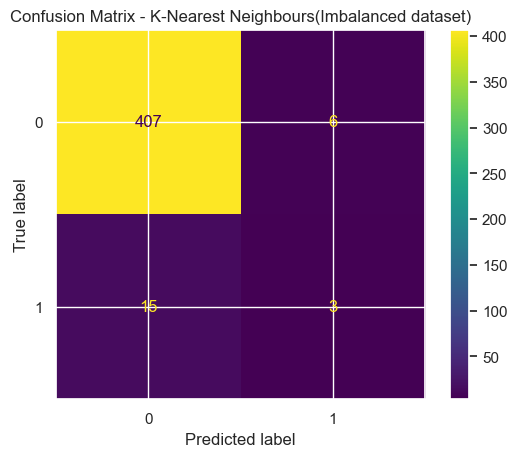

In [58]:
k_nn.plot_cm("K-Nearest Neighbours(Imbalanced dataset)")

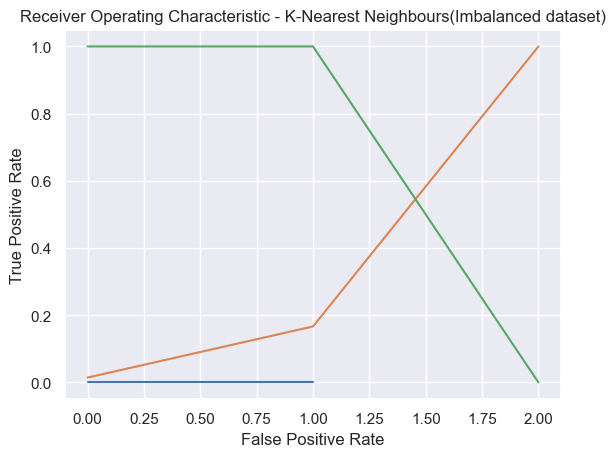

In [59]:
k_nn.plot_roc("K-Nearest Neighbours(Imbalanced dataset)")

In [60]:
rand_for = TrainImbModels(RandomForestClassifier(),x_train, y_train, x_test, y_test)#Random forest
rand_for.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       413
           1       0.60      0.33      0.43        18

    accuracy                           0.96       431
   macro avg       0.79      0.66      0.70       431
weighted avg       0.96      0.96      0.96       431



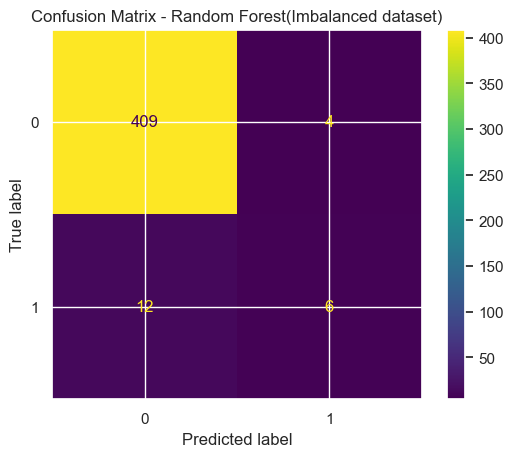

In [61]:
rand_for.plot_cm("Random Forest(Imbalanced dataset)")

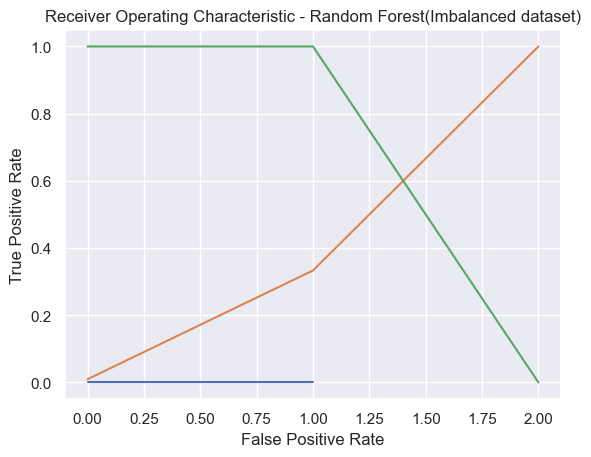

In [62]:
rand_for.plot_roc("Random Forest(Imbalanced dataset)")

In [63]:
log_reg = TrainImbModels(LogisticRegression(),x_train, y_train, x_test, y_test) #Logistic Regression
log_reg.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       413
           1       0.62      0.28      0.38        18

    accuracy                           0.96       431
   macro avg       0.80      0.64      0.68       431
weighted avg       0.95      0.96      0.96       431



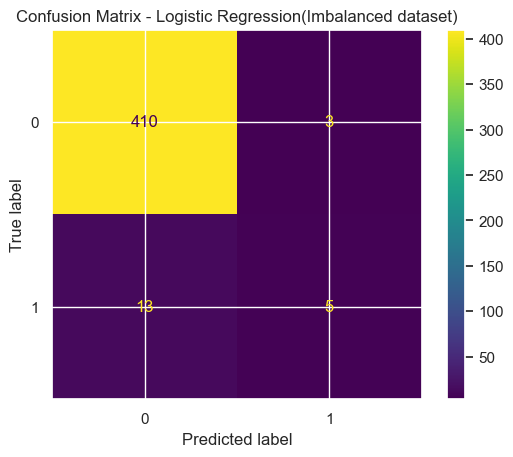

In [64]:
log_reg.plot_cm("Logistic Regression(Imbalanced dataset)")

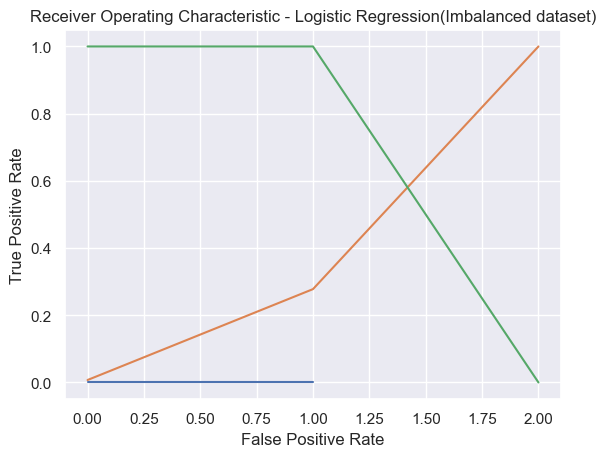

In [65]:
log_reg.plot_roc("Logistic Regression(Imbalanced dataset)")

In [66]:
ada = TrainImbModels(AdaBoostClassifier(),x_train, y_train, x_test, y_test) #Adaptive boosting
ada.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       413
           1       0.56      0.28      0.37        18

    accuracy                           0.96       431
   macro avg       0.76      0.63      0.68       431
weighted avg       0.95      0.96      0.95       431



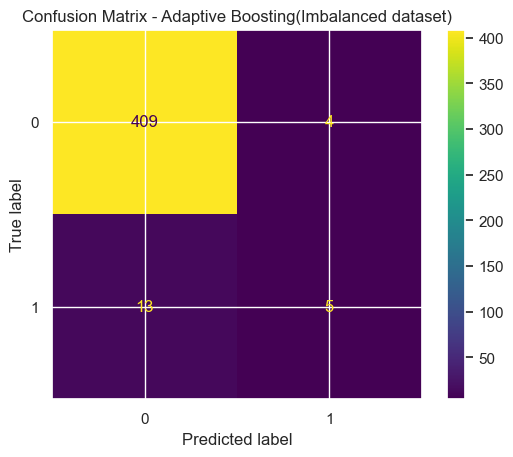

In [67]:
ada.plot_cm("Adaptive Boosting(Imbalanced dataset)")

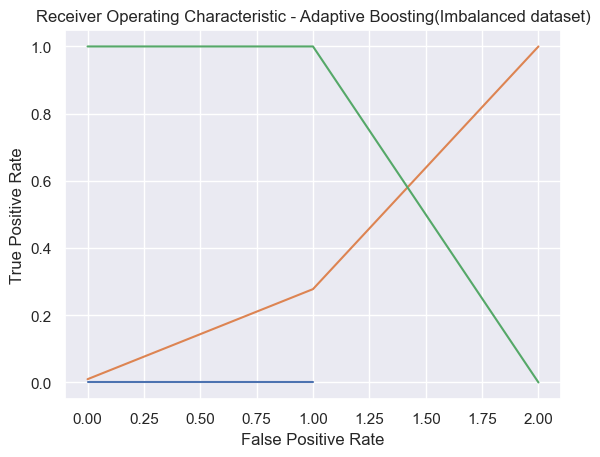

In [68]:
ada.plot_roc("Adaptive Boosting(Imbalanced dataset)")

In [69]:
DT = TrainImbModels(DecisionTreeClassifier(),x_train, y_train, x_test, y_test) #Decision Tree
DT.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       413
           1       0.35      0.33      0.34        18

    accuracy                           0.95       431
   macro avg       0.66      0.65      0.66       431
weighted avg       0.95      0.95      0.95       431



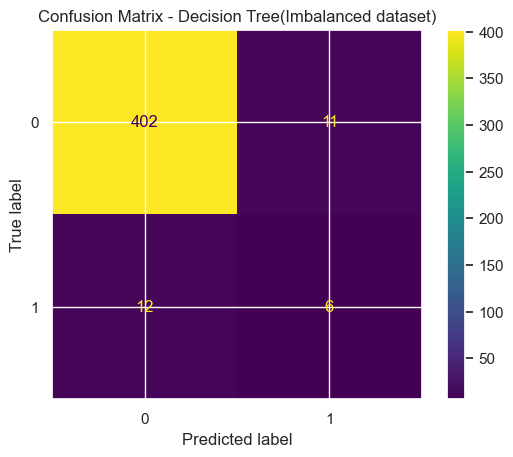

In [70]:
DT.plot_cm("Decision Tree(Imbalanced dataset)")

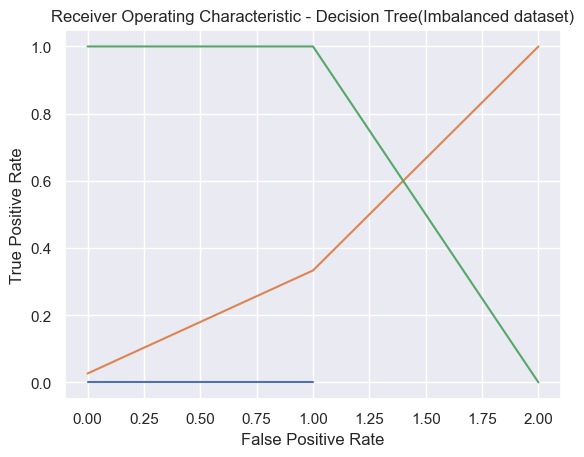

In [71]:
DT.plot_roc("Decision Tree(Imbalanced dataset)")

In [72]:
naive_bayes = TrainImbModels(BernoulliNB(),x_train, y_train, x_test, y_test)
naive_bayes.imb_model()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       413
           1       0.00      0.00      0.00        18

    accuracy                           0.96       431
   macro avg       0.48      0.50      0.49       431
weighted avg       0.92      0.96      0.94       431



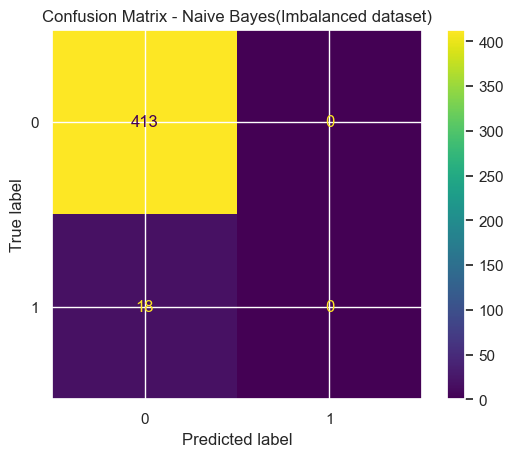

In [73]:
naive_bayes.plot_cm("Naive Bayes(Imbalanced dataset)")

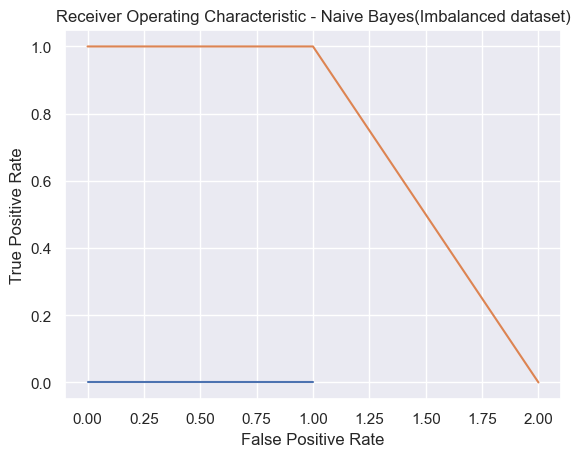

In [74]:
naive_bayes.plot_roc("Naive Bayes(Imbalanced dataset)")

In [75]:
svm = TrainImbModels(SVC(kernel = 'poly'),x_train, y_train, x_test, y_test)
svm.imb_model()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       413
           1       1.00      0.06      0.11        18

    accuracy                           0.96       431
   macro avg       0.98      0.53      0.54       431
weighted avg       0.96      0.96      0.94       431



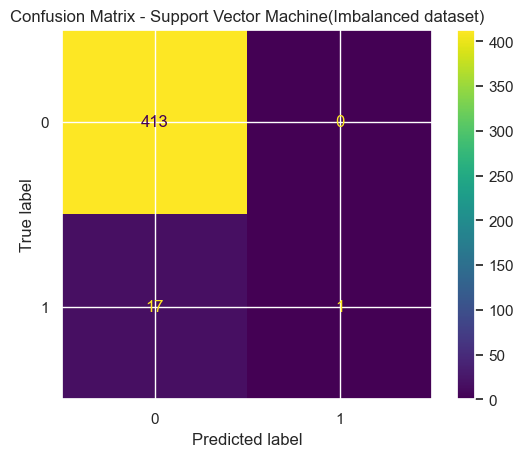

In [76]:
svm.plot_cm("Support Vector Machine(Imbalanced dataset)")

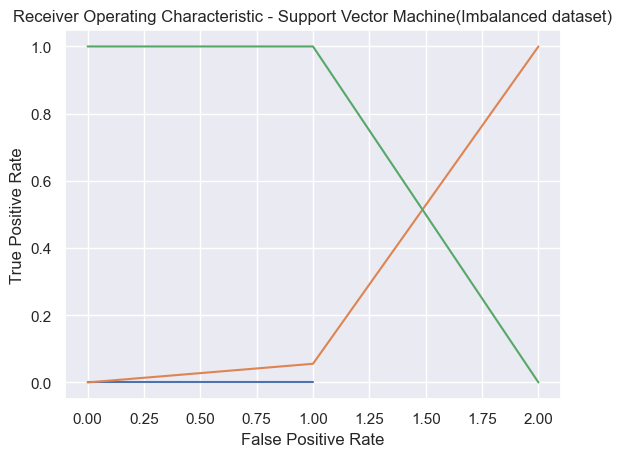

In [77]:
svm.plot_roc("Support Vector Machine(Imbalanced dataset)")

In [78]:
x.columns

Index(['Age', 'Transparency', 'Glucose', 'Protein', 'pH', 'Specific Gravity',
       'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates',
       'Bacteria', 'Gender_FEMALE', 'Gender_MALE', 'Color_AMBER',
       'Color_BROWN', 'Color_DARK YELLOW', 'Color_LIGHT RED',
       'Color_LIGHT YELLOW', 'Color_RED', 'Color_REDDISH',
       'Color_REDDISH YELLOW', 'Color_STRAW', 'Color_YELLOW'],
      dtype='object')

In [79]:
cat_features = ['Transparency', 'Glucose', 'Protein',
       'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates',
       'Bacteria', 'Gender_FEMALE', 'Gender_MALE', 'Color_AMBER',
       'Color_BROWN', 'Color_DARK YELLOW', 'Color_LIGHT RED',
       'Color_LIGHT YELLOW', 'Color_RED', 'Color_REDDISH',
       'Color_REDDISH YELLOW', 'Color_STRAW', 'Color_YELLOW'] #selecting the categorical variables in the dataset
cat = CatBoostClassifier(iterations=500, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           verbose=True)
# Training the model
cat.fit(x_train, y_train, cat_features=cat_features, eval_set=(x_test, y_test), plot=True)

# Making predictions
cat_pred = cat.predict(x_test)
print(classification_report(y_test,cat_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5833604	test: 0.5775649	best: 0.5775649 (0)	total: 41.4ms	remaining: 20.6s
1:	learn: 0.4731266	test: 0.4660593	best: 0.4660593 (1)	total: 60.8ms	remaining: 15.1s
2:	learn: 0.4098844	test: 0.3974864	best: 0.3974864 (2)	total: 101ms	remaining: 16.7s
3:	learn: 0.3450265	test: 0.3338432	best: 0.3338432 (3)	total: 138ms	remaining: 17.1s
4:	learn: 0.3001948	test: 0.2885153	best: 0.2885153 (4)	total: 174ms	remaining: 17.3s
5:	learn: 0.2792526	test: 0.2638564	best: 0.2638564 (5)	total: 203ms	remaining: 16.7s
6:	learn: 0.2492242	test: 0.2338563	best: 0.2338563 (6)	total: 247ms	remaining: 17.4s
7:	learn: 0.2296309	test: 0.2139547	best: 0.2139547 (7)	total: 289ms	remaining: 17.8s
8:	learn: 0.2122237	test: 0.1946532	best: 0.1946532 (8)	total: 345ms	remaining: 18.8s
9:	learn: 0.1973637	test: 0.1803328	best: 0.1803328 (9)	total: 388ms	remaining: 19s
10:	learn: 0.1860310	test: 0.1700017	best: 0.1700017 (10)	total: 430ms	remaining: 19.1s
11:	learn: 0.1763581	test: 0.1620125	best: 0.1620125

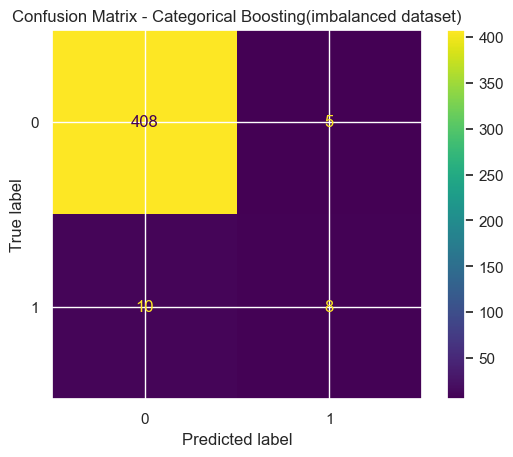

In [80]:
cm = confusion_matrix(y_test,cat_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title('Confusion Matrix - Categorical Boosting(imbalanced dataset)')
plt.show()

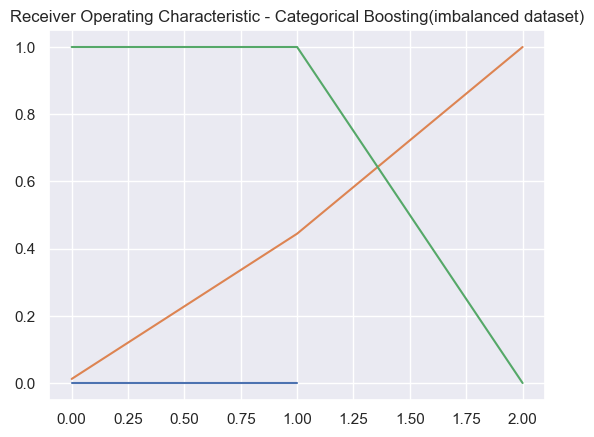

In [81]:
plt.plot(roc_curve(y_test,cat_pred))
plt.title('Receiver Operating Characteristic - Categorical Boosting(imbalanced dataset)')
plt.show()

### Data balancing

In [82]:
smote = SMOTE()
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

In [83]:
knn_bal = TrainImbModels(KNeighborsClassifier(),x_train_bal, y_train_bal, x_test, y_test) #KNN
knn_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       413
           1       0.12      0.50      0.19        18

    accuracy                           0.82       431
   macro avg       0.55      0.67      0.55       431
weighted avg       0.94      0.82      0.87       431



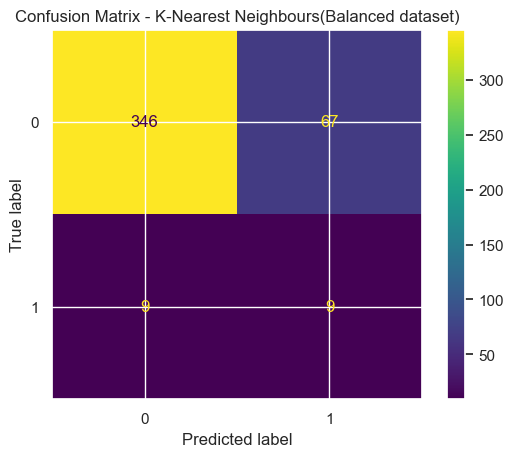

In [84]:
knn_bal.plot_cm("K-Nearest Neighbours(Balanced dataset)")

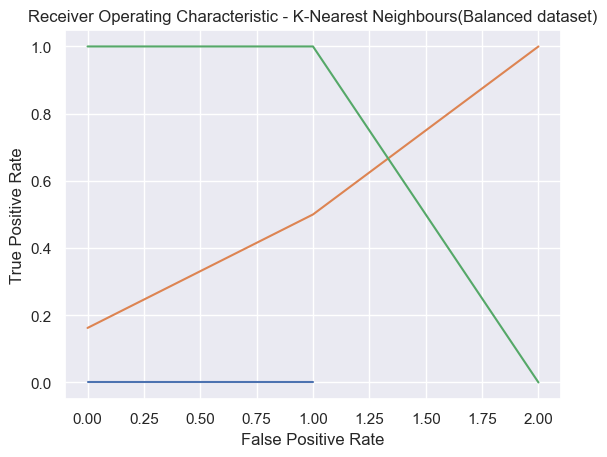

In [85]:
knn_bal.plot_roc("K-Nearest Neighbours(Balanced dataset)")

In [86]:
rand_for_bal = TrainImbModels(RandomForestClassifier(),x_train_bal, y_train_bal, x_test, y_test) #Random forest
rand_for_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       413
           1       0.70      0.39      0.50        18

    accuracy                           0.97       431
   macro avg       0.84      0.69      0.74       431
weighted avg       0.96      0.97      0.96       431



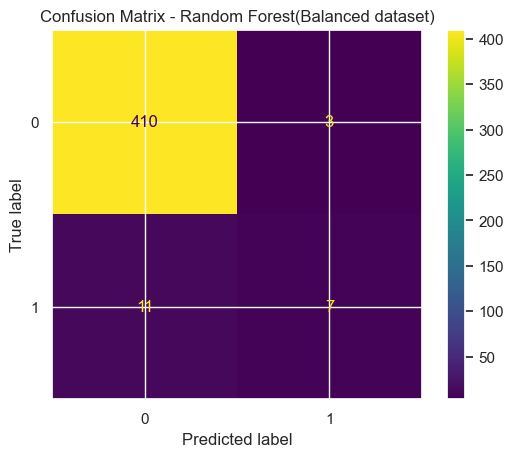

In [87]:
rand_for_bal.plot_cm("Random Forest(Balanced dataset)")

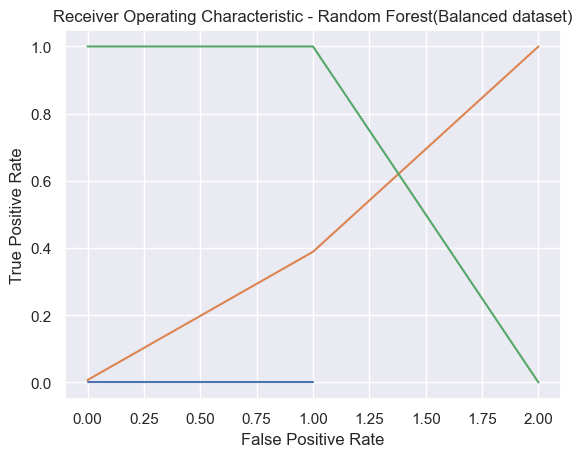

In [88]:
rand_for_bal.plot_roc("Random Forest(Balanced dataset)")

In [89]:
log_reg_bal = TrainImbModels(LogisticRegression(),x_train_bal, y_train_bal, x_test, y_test) #Logistic Regression
log_reg_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       413
           1       0.16      0.44      0.24        18

    accuracy                           0.88       431
   macro avg       0.57      0.67      0.59       431
weighted avg       0.94      0.88      0.91       431



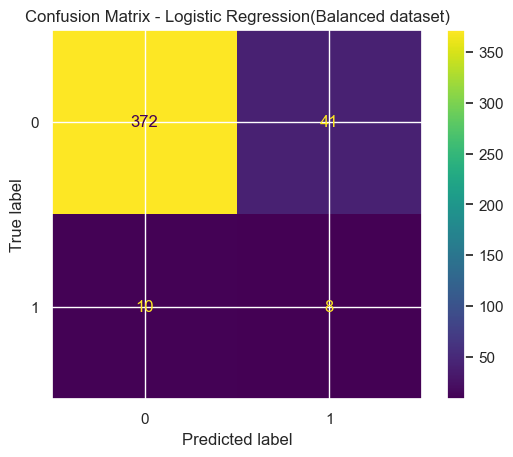

In [90]:
log_reg_bal.plot_cm("Logistic Regression(Balanced dataset)")

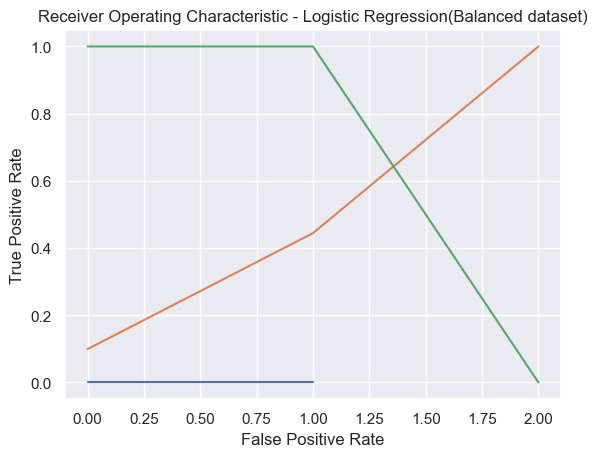

In [91]:
log_reg_bal.plot_roc("Logistic Regression(Balanced dataset)")

In [92]:
ada_bal = TrainImbModels(AdaBoostClassifier(),x_train_bal, y_train_bal, x_test, y_test) #Adaptive boosting
ada_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       413
           1       0.25      0.39      0.30        18

    accuracy                           0.93       431
   macro avg       0.61      0.67      0.63       431
weighted avg       0.94      0.93      0.93       431



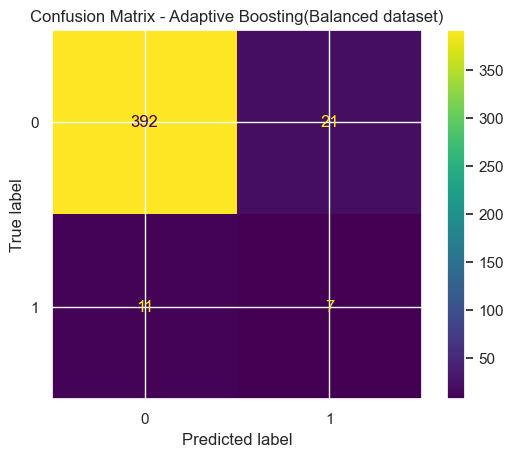

In [93]:
ada_bal.plot_cm("Adaptive Boosting(Balanced dataset)")

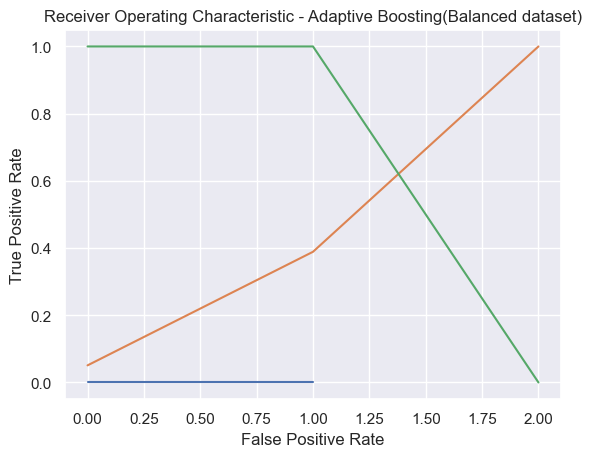

In [94]:
ada_bal.plot_roc("Adaptive Boosting(Balanced dataset)")

In [95]:
DT_bal = TrainImbModels(DecisionTreeClassifier(),x_train_bal, y_train_bal, x_test, y_test) #Decision tree
DT_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       413
           1       0.27      0.33      0.30        18

    accuracy                           0.94       431
   macro avg       0.62      0.65      0.63       431
weighted avg       0.94      0.94      0.94       431



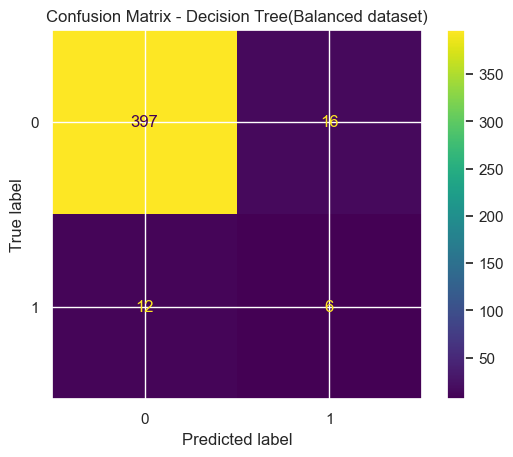

In [96]:
DT_bal.plot_cm("Decision Tree(Balanced dataset)")

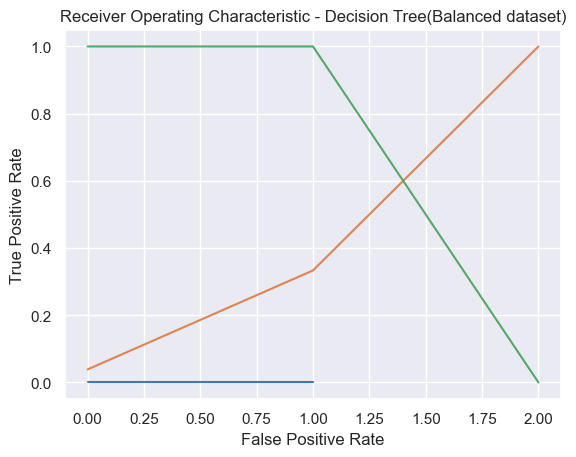

In [97]:
DT_bal.plot_roc("Decision Tree(Balanced dataset)")

In [98]:
naive_bayes_bal = TrainImbModels(BernoulliNB(),x_train_bal, y_train_bal, x_test, y_test) #Naive bayes
naive_bayes_bal.imb_model()

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       413
           1       0.04      0.22      0.06        18

    accuracy                           0.73       431
   macro avg       0.50      0.49      0.45       431
weighted avg       0.92      0.73      0.81       431



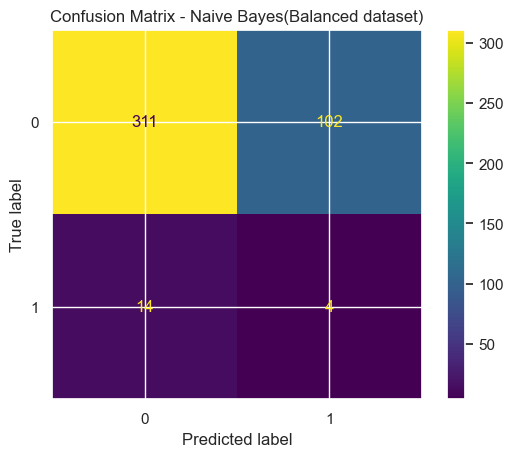

In [99]:
naive_bayes_bal.plot_cm("Naive Bayes(Balanced dataset)")

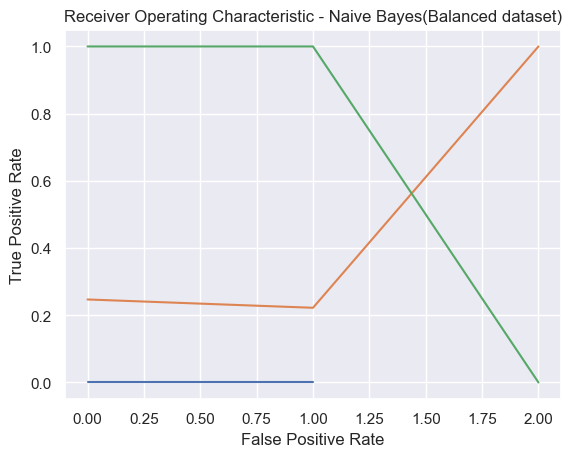

In [100]:
naive_bayes_bal.plot_roc("Naive Bayes(Balanced dataset)")

In [101]:
svm_bal = TrainImbModels(SVC(kernel = 'poly'),x_train_bal, y_train_bal, x_test, y_test) #Support vector machine
svm_bal.imb_model()

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       413
           1       0.20      0.50      0.28        18

    accuracy                           0.89       431
   macro avg       0.59      0.71      0.61       431
weighted avg       0.94      0.89      0.91       431



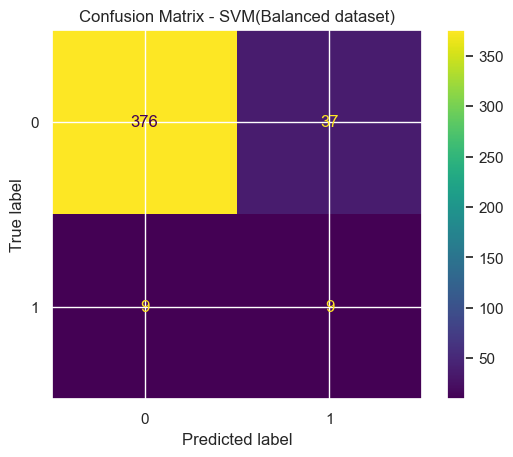

In [102]:
svm_bal.plot_cm("SVM(Balanced dataset)")

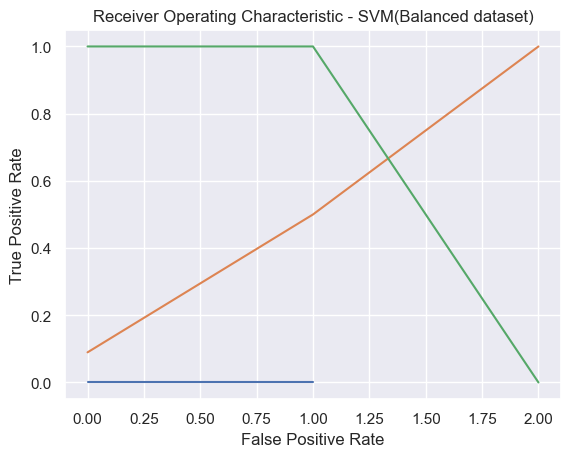

In [103]:
svm_bal.plot_roc("SVM(Balanced dataset)")

In [104]:
cat_feature = [ 'Transparency', 'Glucose', 'Protein',
       'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates',
       'Bacteria', 'Gender_FEMALE', 'Gender_MALE', 'Color_AMBER',
       'Color_BROWN', 'Color_DARK YELLOW', 'Color_LIGHT RED',
       'Color_LIGHT YELLOW', 'Color_RED', 'Color_REDDISH',
       'Color_REDDISH YELLOW', 'Color_STRAW', 'Color_YELLOW']

In [105]:
cat_bal = CatBoostClassifier(iterations=500, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           verbose=True)
# Training the model
cat_bal.fit(x_train_bal, y_train_bal, cat_features=cat_feature, eval_set=(x_test, y_test), plot=True)
# Making predictions
cat_bal_pred = cat_bal.predict(x_test)
print(classification_report(y_test,cat_bal_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6063455	test: 0.6128686	best: 0.6128686 (0)	total: 38.5ms	remaining: 19.2s
1:	learn: 0.5307422	test: 0.5465154	best: 0.5465154 (1)	total: 70.8ms	remaining: 17.6s
2:	learn: 0.4654563	test: 0.4894859	best: 0.4894859 (2)	total: 103ms	remaining: 17.1s
3:	learn: 0.4350464	test: 0.4643835	best: 0.4643835 (3)	total: 133ms	remaining: 16.5s
4:	learn: 0.3891444	test: 0.4196798	best: 0.4196798 (4)	total: 164ms	remaining: 16.3s
5:	learn: 0.3602474	test: 0.3903293	best: 0.3903293 (5)	total: 193ms	remaining: 15.9s
6:	learn: 0.3324470	test: 0.3579569	best: 0.3579569 (6)	total: 223ms	remaining: 15.7s
7:	learn: 0.3106153	test: 0.3372946	best: 0.3372946 (7)	total: 254ms	remaining: 15.6s
8:	learn: 0.2906080	test: 0.3191030	best: 0.3191030 (8)	total: 295ms	remaining: 16.1s
9:	learn: 0.2729911	test: 0.3041781	best: 0.3041781 (9)	total: 331ms	remaining: 16.2s
10:	learn: 0.2584720	test: 0.2887946	best: 0.2887946 (10)	total: 363ms	remaining: 16.1s
11:	learn: 0.2526520	test: 0.2835176	best: 0.28351

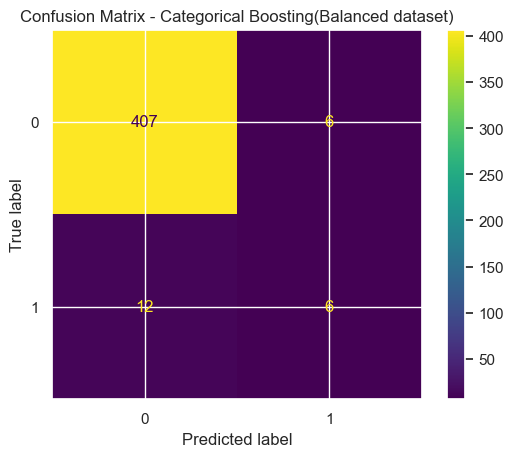

In [106]:
cm = confusion_matrix(y_test,cat_bal_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title('Confusion Matrix - Categorical Boosting(Balanced dataset)')
plt.show()

Text(0.5, 1.0, 'Receiver Operating Characteristic - Catboost(Balanced dataset)')

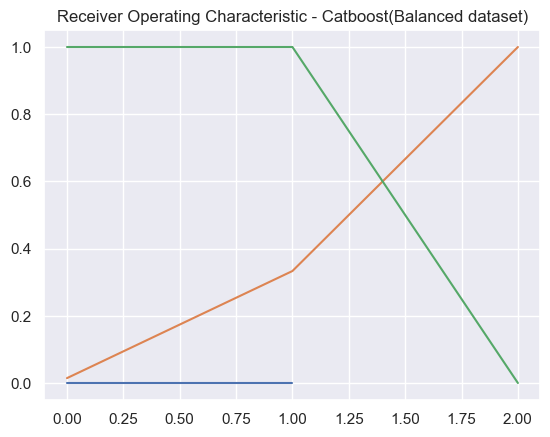

In [107]:
plt.plot(roc_curve(y_test,cat_bal_pred))
plt.title('Receiver Operating Characteristic - Catboost(Balanced dataset)')

In [108]:
data = {'knn_class_0': [0.98,0.84,0.90],'knn_class_1': [0.13,0.56,0.21],
        'ada_class_0': [0.97,0.96,0.96],'ada_class_1': [0.27,0.39,0.32],
        'log_class_0': [0.97,0.91,0.94],'log_class_1': [0.16,0.39,0.23],
        'rfc_class_0': [0.97,0.99,0.98],'rfc_class_1': [0.57,0.22,0.32],
        'dt_class_0': [0.97,0.96,0.97], 'dt_class_1': [0.32,0.39,0.35],
        'nb_class_0': [0.96,0.75,0.84], 'nb_class_1': [0.04,0.22,0.06],
        'svm_class_0': [0.98,0.91,0.94], 'svm_class_1': [0.19,0.50,0.28],
        'cat_class_0': [0.98,0.99,0.98], 'cat_class_1': [0.62,0.44,0.52]}
metrics_df= pd.DataFrame(data,index = ['precision','recall','f1_score'])
#acc = pd.Series({'accuracy':[82,93,90,96,92,93,89,97]})
     

In [109]:
metrics_df

,knn_class_0,knn_class_1,ada_class_0,ada_class_1,log_class_0,log_class_1,rfc_class_0,rfc_class_1,dt_class_0,dt_class_1,nb_class_0,nb_class_1,svm_class_0,svm_class_1,cat_class_0,cat_class_1
precision,0.98,0.13,0.97,0.27,0.97,0.16,0.97,0.57,0.97,0.32,0.96,0.04,0.98,0.19,0.98,0.62
recall,0.84,0.56,0.96,0.39,0.91,0.39,0.99,0.22,0.96,0.39,0.75,0.22,0.91,0.50,0.99,0.44
f1_score,0.90,0.21,0.96,0.32,0.94,0.23,0.98,0.32,0.97,0.35,0.84,0.06,0.94,0.28,0.98,0.52


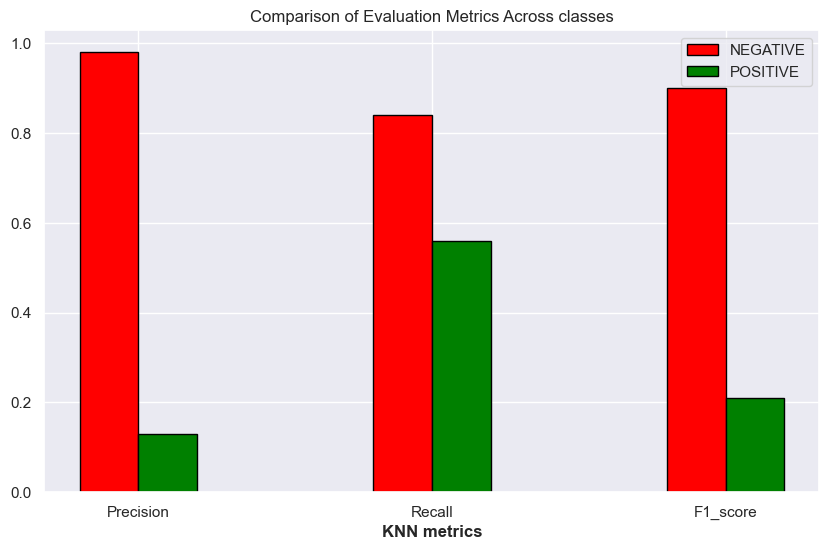

In [110]:
# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(metrics_df))  # First set of bars
r2 = [x + bar_width for x in r1]  # Second set of bars
r3 = [x + bar_width for x in r2]  # Third set of bars

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(r1, metrics_df['knn_class_0'], color='red', width=bar_width, edgecolor='black', label='NEGATIVE')
plt.bar(r2, metrics_df['knn_class_1'], color='green', width=bar_width, edgecolor='black', label='POSITIVE')
#plt.bar(r3, metrics_df[['knn_class_0','ada_class_1']], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('KNN metrics', fontweight='bold')
plt.xticks(ticks = [0.1,1.1,2.1],labels = ['Precision','Recall','F1_score'])
#plt.set_xticklabels()
# Add title and legend
plt.title('Comparison of Evaluation Metrics Across classes')
plt.legend()
values =[0.98, 0.13, 0.84, 0.56, 0.9 , 0.21]

# Show the plot
plt.show()


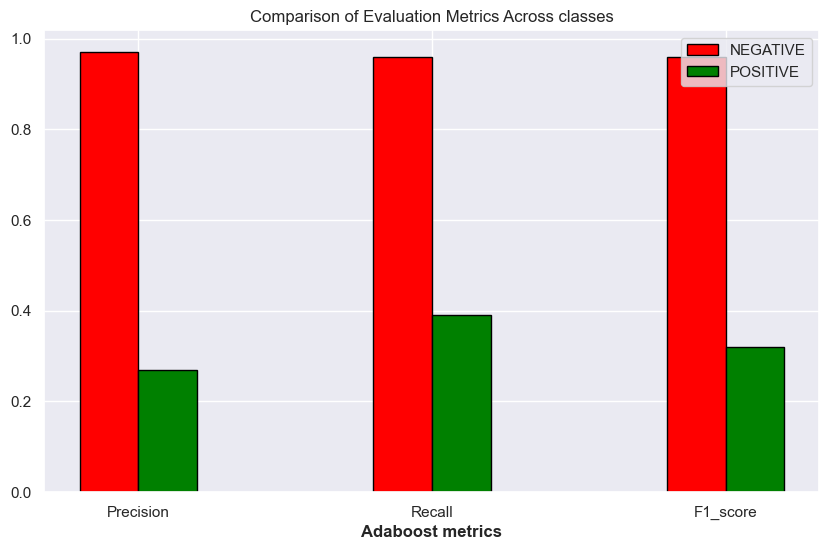

In [111]:
# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(metrics_df))  # First set of bars
r2 = [x + bar_width for x in r1]  # Second set of bars
r3 = [x + bar_width for x in r2]  # Third set of bars

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(r1, metrics_df['ada_class_0'], color='red', width=bar_width, edgecolor='black', label='NEGATIVE')
plt.bar(r2, metrics_df['ada_class_1'], color='green', width=bar_width, edgecolor='black', label='POSITIVE')
#plt.bar(r3, metrics_df[['knn_class_0','ada_class_1']], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Adaboost metrics', fontweight='bold')
plt.xticks(ticks = [0.1,1.1,2.1],labels = ['Precision','Recall','F1_score'])
#plt.set_xticklabels()
# Add title and legend
plt.title('Comparison of Evaluation Metrics Across classes')
plt.legend()
values =[0.98, 0.13, 0.84, 0.56, 0.9 , 0.21]

# Show the plot
plt.show()


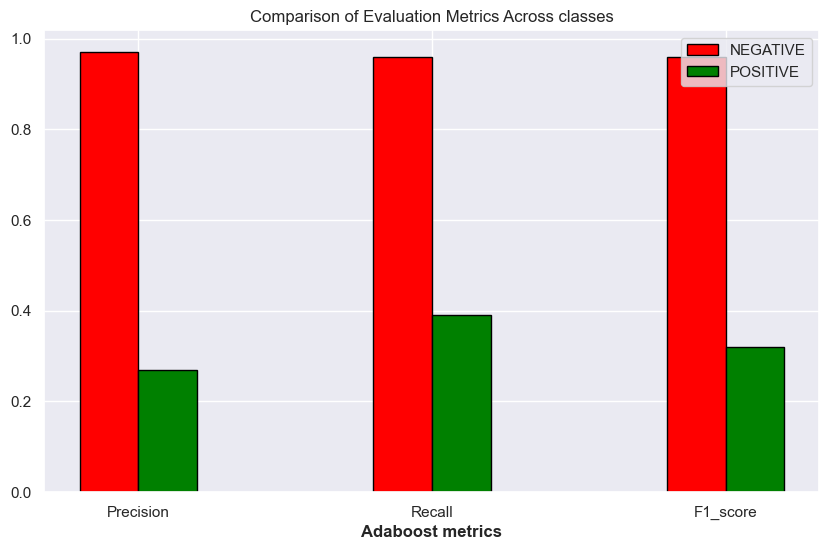

In [112]:
# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(metrics_df))  # First set of bars
r2 = [x + bar_width for x in r1]  # Second set of bars
r3 = [x + bar_width for x in r2]  # Third set of bars

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(r1, metrics_df['ada_class_0'], color='red', width=bar_width, edgecolor='black', label='NEGATIVE')
plt.bar(r2, metrics_df['ada_class_1'], color='green', width=bar_width, edgecolor='black', label='POSITIVE')
#plt.bar(r3, metrics_df[['knn_class_0','ada_class_1']], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Adaboost metrics', fontweight='bold')
plt.xticks(ticks = [0.1,1.1,2.1],labels = ['Precision','Recall','F1_score'])
#plt.set_xticklabels()
# Add title and legend
plt.title('Comparison of Evaluation Metrics Across classes')
plt.legend()

# Show the plot
plt.show()


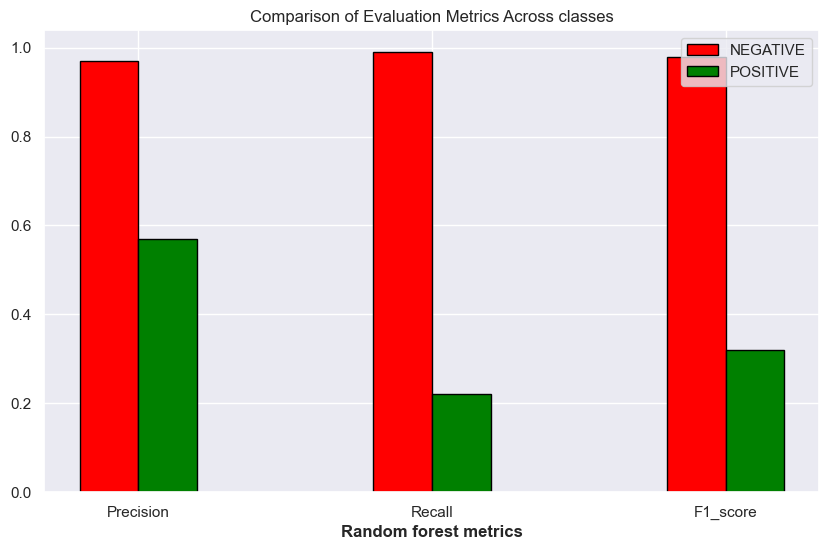

In [113]:
# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(metrics_df))  # First set of bars
r2 = [x + bar_width for x in r1]  # Second set of bars

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(r1, metrics_df['rfc_class_0'], color='red', width=bar_width, edgecolor='black', label='NEGATIVE')
plt.bar(r2, metrics_df['rfc_class_1'], color='green', width=bar_width, edgecolor='black', label='POSITIVE')
#plt.bar(r3, metrics_df[['knn_class_0','ada_class_1']], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Random forest metrics', fontweight='bold')
plt.xticks(ticks = [0.1,1.1,2.1],labels = ['Precision','Recall','F1_score'])
#plt.set_xticklabels()
# Add title and legend
plt.title('Comparison of Evaluation Metrics Across classes')
plt.legend()
values =[0.98, 0.13, 0.84, 0.56, 0.9 , 0.21]

# Show the plot
plt.show()


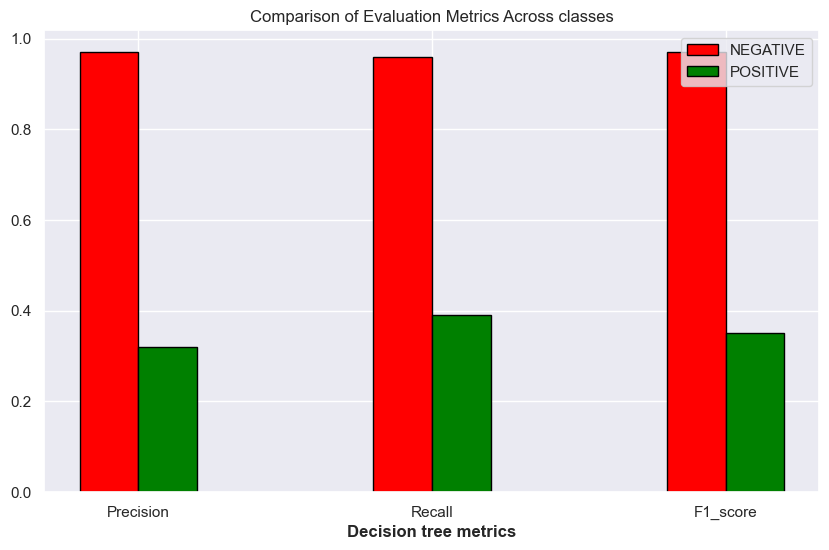

In [115]:
# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(metrics_df))  # First set of bars
r2 = [x + bar_width for x in r1]  # Second set of bars

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(r1, metrics_df['dt_class_0'], color='red', width=bar_width, edgecolor='black', label='NEGATIVE')
plt.bar(r2, metrics_df['dt_class_1'], color='green', width=bar_width, edgecolor='black', label='POSITIVE')
#plt.bar(r3, metrics_df[['knn_class_0','ada_class_1']], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Decision tree metrics', fontweight='bold')
plt.xticks(ticks = [0.1,1.1,2.1],labels = ['Precision','Recall','F1_score'])
#plt.set_xticklabels()
# Add title and legend
plt.title('Comparison of Evaluation Metrics Across classes')
plt.legend()
values =[0.98, 0.13, 0.84, 0.56, 0.9 , 0.21]

# Show the plot
plt.show()


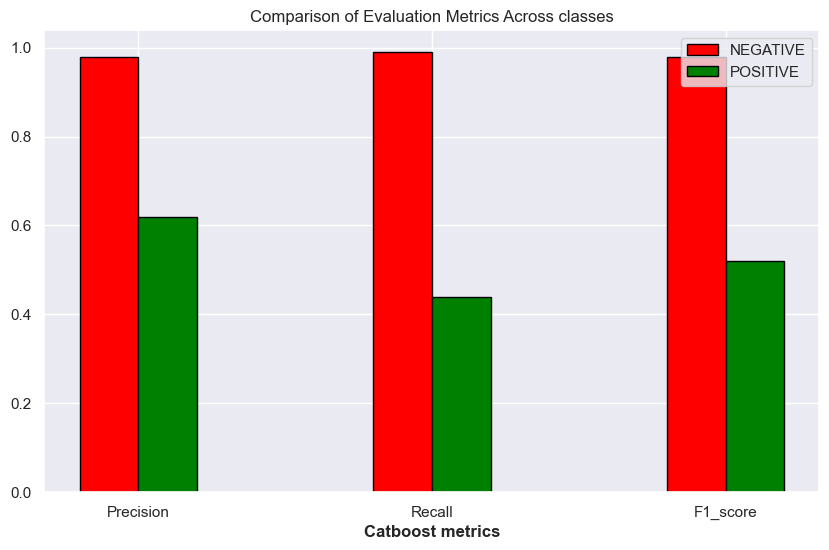

In [116]:
# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(metrics_df))  # First set of bars
r2 = [x + bar_width for x in r1]  # Second set of bars

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(r1, metrics_df['cat_class_0'], color='red', width=bar_width, edgecolor='black', label='NEGATIVE')
plt.bar(r2, metrics_df['cat_class_1'], color='green', width=bar_width, edgecolor='black', label='POSITIVE')
#plt.bar(r3, metrics_df[['knn_class_0','ada_class_1']], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Catboost metrics', fontweight='bold')
plt.xticks(ticks = [0.1,1.1,2.1],labels = ['Precision','Recall','F1_score'])
#plt.set_xticklabels()
# Add title and legend
plt.title('Comparison of Evaluation Metrics Across classes')
plt.legend()

# Show the plot
plt.show()


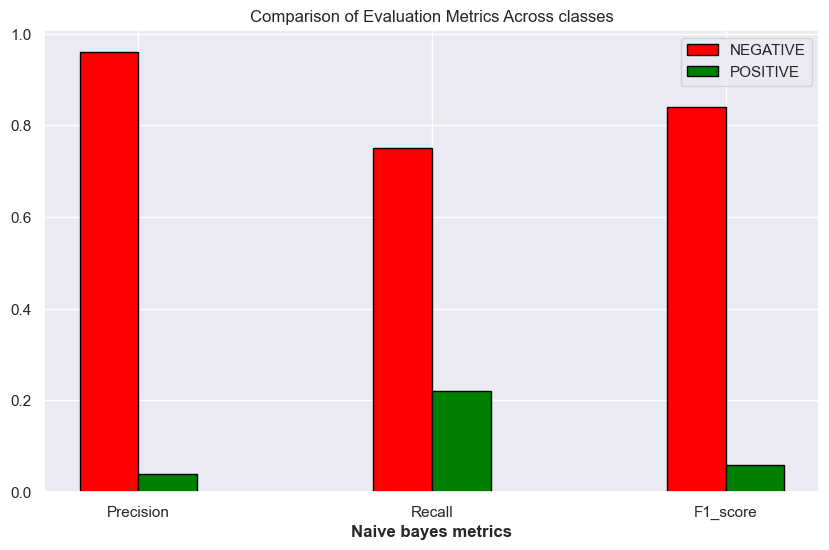

In [121]:
# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(metrics_df))  # First set of bars
r2 = [x + bar_width for x in r1]  # Second set of bars

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(r1, metrics_df['nb_class_0'], color='red', width=bar_width, edgecolor='black', label='NEGATIVE')
plt.bar(r2, metrics_df['nb_class_1'], color='green', width=bar_width, edgecolor='black', label='POSITIVE')
#plt.bar(r3, metrics_df[['knn_class_0','ada_class_1']], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Naive bayes metrics', fontweight='bold')
plt.xticks(ticks = [0.1,1.1,2.1],labels = ['Precision','Recall','F1_score'])
#plt.set_xticklabels()
# Add title and legend
plt.title('Comparison of Evaluation Metrics Across classes')
plt.legend()

# Show the plot
plt.show()


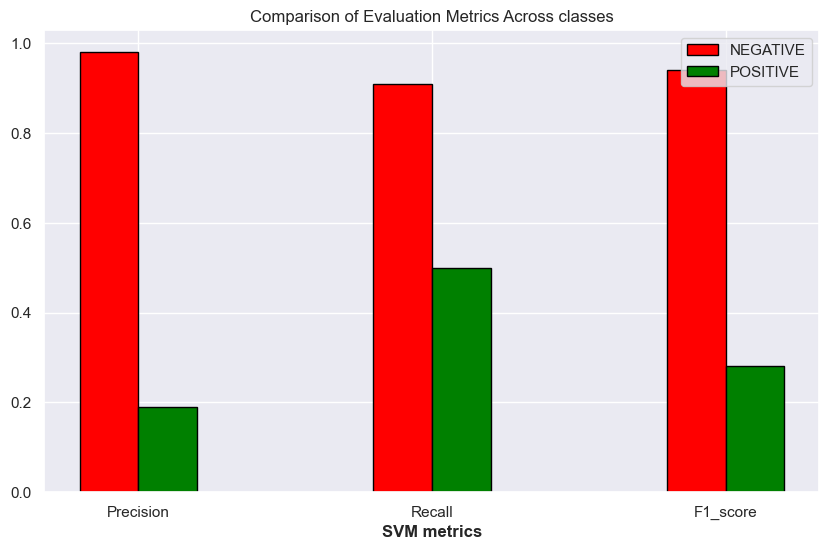

In [122]:
# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(metrics_df))  # First set of bars
r2 = [x + bar_width for x in r1]  # Second set of bars

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(r1, metrics_df['svm_class_0'], color='red', width=bar_width, edgecolor='black', label='NEGATIVE')
plt.bar(r2, metrics_df['svm_class_1'], color='green', width=bar_width, edgecolor='black', label='POSITIVE')
#plt.bar(r3, metrics_df[['knn_class_0','ada_class_1']], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('SVM metrics', fontweight='bold')
plt.xticks(ticks = [0.1,1.1,2.1],labels = ['Precision','Recall','F1_score'])
#plt.set_xticklabels()
# Add title and legend
plt.title('Comparison of Evaluation Metrics Across classes')
plt.legend()

# Show the plot
plt.show()


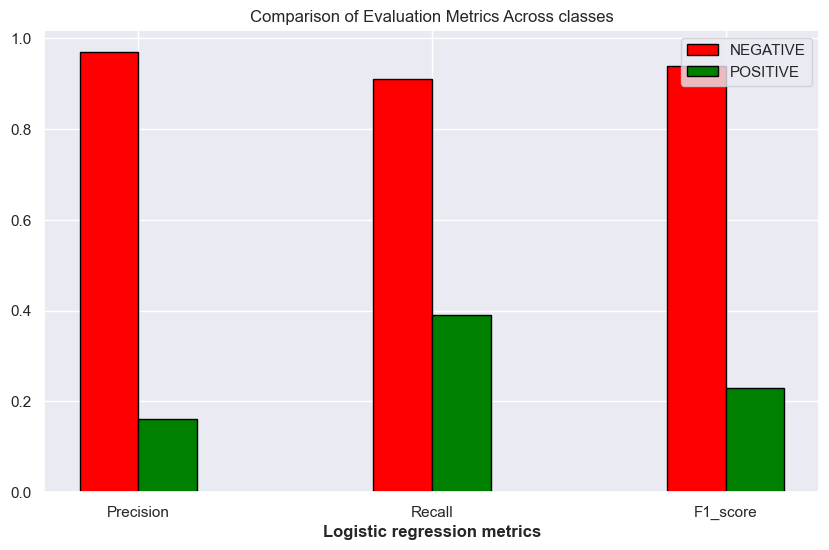

In [123]:
# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(metrics_df))  # First set of bars
r2 = [x + bar_width for x in r1]  # Second set of bars

# Create the bar plot
plt.figure(figsize=(10, 6))

plt.bar(r1, metrics_df['log_class_0'], color='red', width=bar_width, edgecolor='black', label='NEGATIVE')
plt.bar(r2, metrics_df['log_class_1'], color='green', width=bar_width, edgecolor='black', label='POSITIVE')
#plt.bar(r3, metrics_df[['knn_class_0','ada_class_1']], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Logistic regression metrics', fontweight='bold')
plt.xticks(ticks = [0.1,1.1,2.1],labels = ['Precision','Recall','F1_score'])
#plt.set_xticklabels()
# Add title and legend
plt.title('Comparison of Evaluation Metrics Across classes')
plt.legend()

# Show the plot
plt.show()
